## Import something

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
import os 

import random
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [57]:
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

Random seed configuration

In [58]:
seed = 2024

np.random.seed(seed)
random.seed(seed)
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)

# Set a fixed value for the hash seed
os.environ["PYTHONHASHSEED"] = str(seed)

# When running on the CuDNN backend, two further options must be set
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

f"Random seed set as {seed}"

'Random seed set as 2024'

Let’s generate two-dimensional data points using three normal distributions.

In [59]:
nodp = 100 # Number of data points

# Class 1
mean1 = [0, 0]
cov1 = [[0.1, 0], [0, 0.1]]
X1 = np.random.multivariate_normal(mean1, cov1, nodp)
y1 = np.full(nodp, 0)
 
# Class 2
mean2 = [10, 0]
cov2 = [[0.1, 0], [0, 0.1]]
X2 = np.random.multivariate_normal(mean2, cov2, nodp)
y2 = np.full(nodp, 1)
 
# Class 3
mean3 = [5, 6]
cov3 = [[0.1, 0], [0, 0.1]]
X3 = np.random.multivariate_normal(mean3, cov3, nodp)
y3 = np.full(nodp, 2)

In [60]:
X = np.concatenate([X1, X2, X3], axis=0)
X.shape

(300, 2)

In [61]:
y = np.concatenate([y1, y2, y3], axis=0)
y.shape

(300,)

In [62]:
def matrix_normalizer(matrix: np.ndarray) -> np.ndarray:
    normalized_matrix = np.empty_like(matrix)
    _, cols = matrix.shape
    for col in range(cols):
        normalized_matrix[:, col] = (matrix[:, col] - matrix[:, col].min()) / (
            matrix[:, col].max() - matrix[:, col].min()
        )
    return normalized_matrix

In [63]:
X = matrix_normalizer(X)
X.shape

(300, 2)

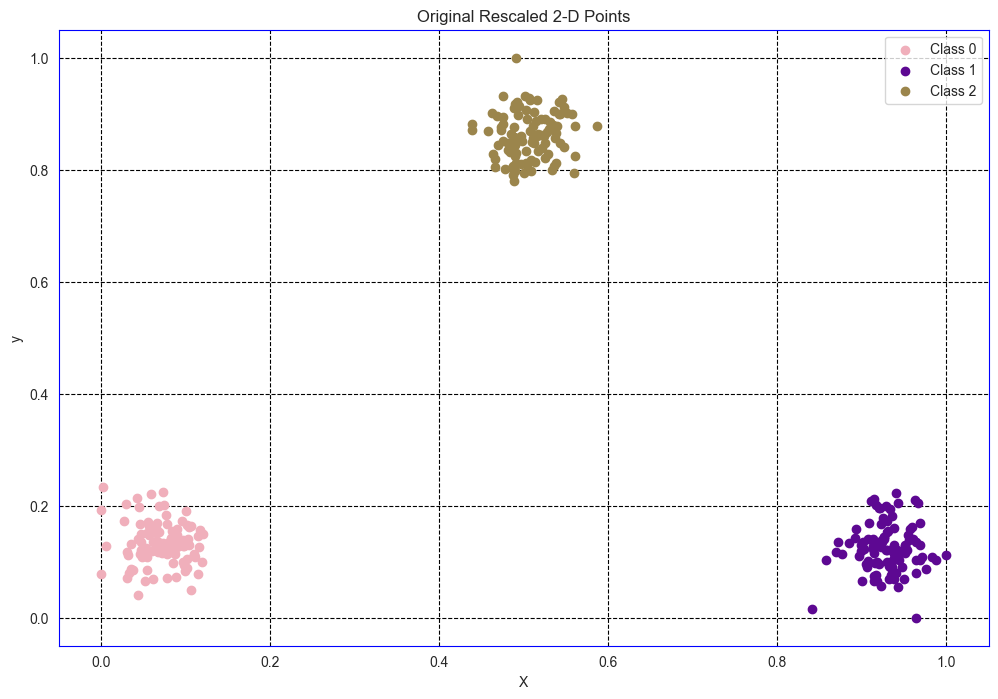

In [64]:
def scattering(
    X: np.ndarray,
    y: np.ndarray,
    xlabel: str = "X",
    ylabel: str = "y",
    title: str = None,
    figsize: tuple = (12, 8),
) -> bool:
    num_classes = len(np.unique(y))
    colors_ = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
    colors = colors_(num_classes)
    
    for cls in range(num_classes):
        idx = np.where(y == cls)
        plt.scatter(X[idx, 0], X[idx, 1], c=colors[cls], label=f'Class {cls}')
        
    # Labeling the plot
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel=ylabel)
    plt.title(title)
    plt.legend()

    # Display the plot
    plt.show()
    
scattering(X, y, title="Original Rescaled 2-D Points")

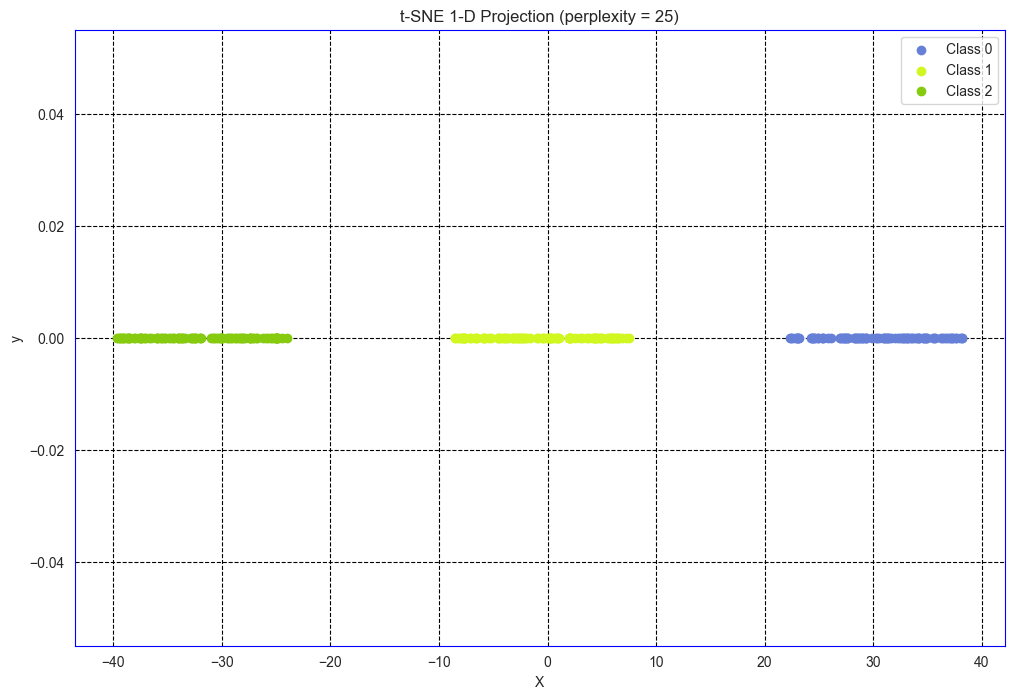

In [65]:
perplexity = 25
X_embedded = TSNE(
    n_components=1,
    perplexity=perplexity,
    learning_rate="auto",
    init="random",
    random_state=seed,
).fit_transform(X)

X_embedded = np.hstack((X_embedded, np.zeros((X_embedded.shape[0], 1), dtype=X_embedded.dtype)))

scattering(X_embedded, y, title='t-SNE 1-D Projection (perplexity = {})'.format(perplexity))

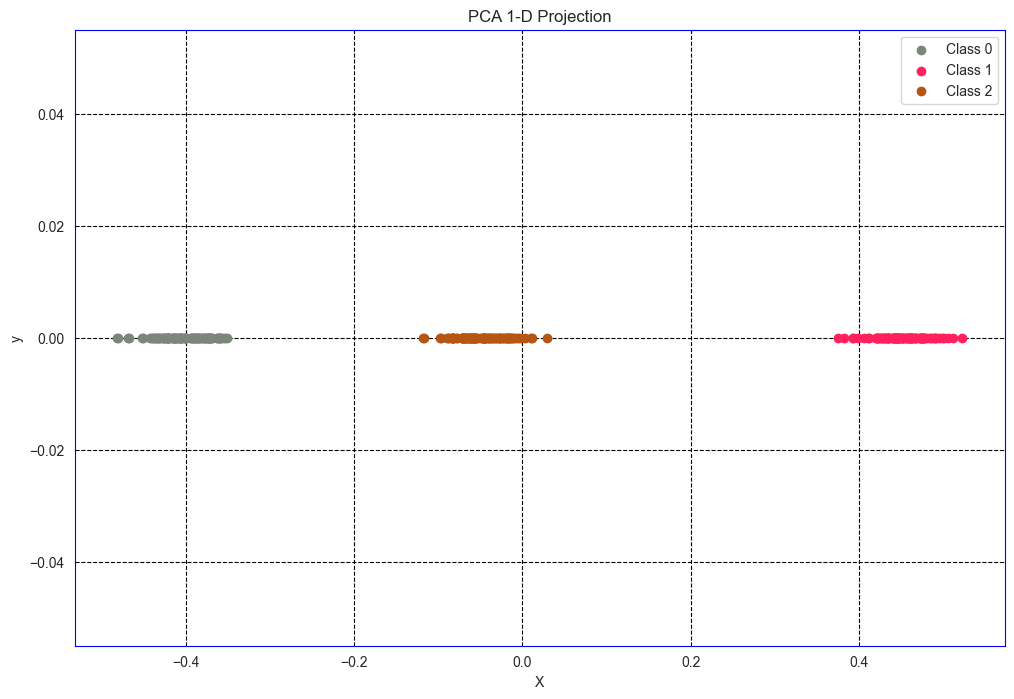

In [66]:
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)

X_reduced = np.hstack((X_reduced, np.zeros((X_reduced.shape[0], 1), dtype=X_reduced.dtype)))

scattering(X_reduced, y, title="PCA 1-D Projection")

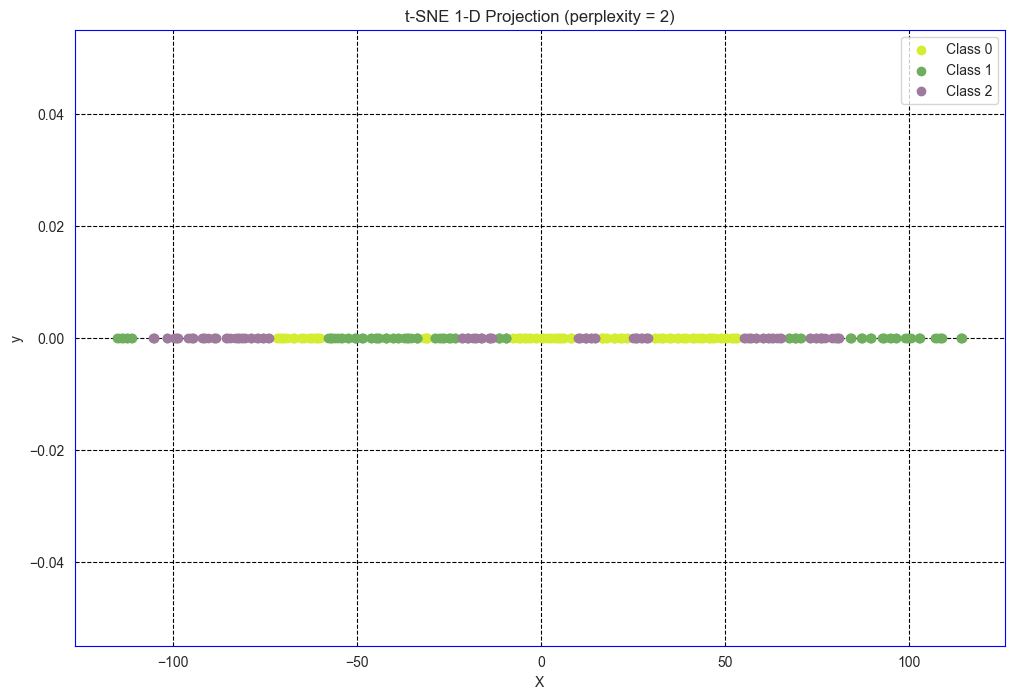

In [67]:
perplexity = 2
X_embedded = TSNE(
    n_components=1,
    perplexity=perplexity,
    learning_rate="auto",
    init="random",
    random_state=seed,
).fit_transform(X)

X_embedded = np.hstack((X_embedded, np.zeros((X_embedded.shape[0], 1), dtype=X_embedded.dtype)))

scattering(X_embedded, y, title='t-SNE 1-D Projection (perplexity = {})'.format(perplexity))